In [3]:
import warnings
warnings.filterwarnings('ignore')
# DEMO = False

In [4]:
%run config.ipynb
%run preprocessing.ipynb
%run NaiveBaseline.ipynb
%run DecisionTree.ipynb
%run FirstLinModel.ipynb
%run RandomForest.ipynb
%run final_preprocess.ipynb

CPU times: user 10.5 s, sys: 1.07 s, total: 11.6 s
Wall time: 11.6 s


In [5]:
import time
import psutil
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [9]:
def run_all(train=TRAIN, test=TEST):
    """
    Executes the preprocessing and all models in the proper sequence
    param: TRAIN and TEST paths
    return: Print statements regarding running time and a csv containing the prediction results of the algorithms
    """

    start_time = time.time()

    # Start CPU load check
    cpu_process = psutil.Process()
    cpu_process.cpu_percent()

    # Fetch data
    print("Loading data..")
    data = get_data(train, test)
    print(f"Fetching the data took: {round(time.time() - start_time, 2)} seconds")
    print("\n")

    # Preprocessing
    prep_time = time.time()
    print("Preprocessing initiated..")
    processed = preprocess(data)
    print(f"Preprocessing took: {round(time.time() - prep_time, 2)} seconds")
    print("\n")

    # Naive Baseline:
    naive_time = time.time()
    time_time = time.time()
    print("Naive Baseline Initiated..")
    df_naive = processed.copy()
    print("Calculating time differences!")
    NaiveTime(df_naive)
    print(f"Time calculation done in: {round((time.time() - time_time), 2)} seconds")
    event_time = time.time()
    print("Predicting next events..")
    NaiveEvent(df_naive)
    print(f"Event prediction done in: {round(time.time() - event_time, 2)} seconds")
    print("\n")
    print(f"The baseline model ran in {round(time.time() - naive_time, 2)} seconds")
    print("\n")

    X_train, X_test, y_train, y_test = features_split(processed)
    
    # Initial Linear Model
    lin_time = time.time()
    print("Initial Linear Model Running!")
    X_train_lin, X_test_lin, y_train_lin, y_test_lin = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()
    SimpleModel(X_train_lin, X_test_lin, y_train_lin, y_test_lin)
    print(f"The inital linear model ran in: {round(time.time() - lin_time, 2)} seconds")
    print("\n")
    del X_train_lin, X_test_lin, y_train_lin, y_test_lin

    # Decision Tree
    tree_time = time.time()
    print("Decision Tree Initiated..")
    X_train_tree, X_test_tree, y_train_tree, y_test_tree = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

    TreeModel(X_train_tree, X_test_tree, y_train_tree, y_test_tree)
    print(f"The decision tree was constructed in: {round(time.time() - tree_time, 2)} seconds")
    print("\n")
    del X_train_tree, X_test_tree, y_train_tree, y_test_tree

    # Linear Model
    comp_time = time.time()
    print("Complex Linear Model Running..")
    %run complexlinear.ipynb
    
    
    print(f"The complex linear model ran in: {round(time.time() - comp_time, 2)} seconds")
    print("\n")

    # Random Forest
    forest_time = time.time()
    print("Random Forest growing..")
    X_forest, X_test_forest, y_forest, y_test_forest = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()
    ForestModel(X_forest, X_test_forest, y_forest, y_test_forest)
    print(f"The forest grew in: {round(time.time() - forest_time, 2)} seconds")
    print("\n")

    memory_usage = psutil.Process().memory_info().rss / 1024 **2

    # Show CPU + Memory
    print(f"Memory useage: {round(memory_usage)} MB")
    print(f"CPU percentage: {cpu_process.cpu_percent()} %")
    print(f"Run time of algorithm: {round(time.time() - start_time, 2)} seconds")
    



    print(len(data))

Loading data..
Fetching the data took: 2.27 seconds


Preprocessing initiated..
Preprocessing took: 6.57 seconds


Naive Baseline Initiated..
Calculating time differences!


Error metrics for the Naive Time time model


Mean Absolute Error: 6825.508592723689
Mean Squared Error: 425813621.8758078
Root Mean Squared Error: 20635.251921791696
$R_2$ score: -0.12167788810271696


Time calculation done in: 0.68 seconds
Predicting next events..


Error metrics for the Naive Event event model


The accuracy of the model is 0.3806625317005291.
The precision of the model is 0.32842011174088465, using weighted average.
The recall of the model is 0.3806625317005291, using weighted average.
The f1-score of the model is 0.3425175516236353, using weighted average.


Event prediction done in: 5.35 seconds


The baseline model ran in 6.03 seconds


Initial Linear Model Running!


Error metrics for the Simple Linear Model time model


Mean Absolute Error: 10867.943756934708
Mean Squared Error: 346560910.

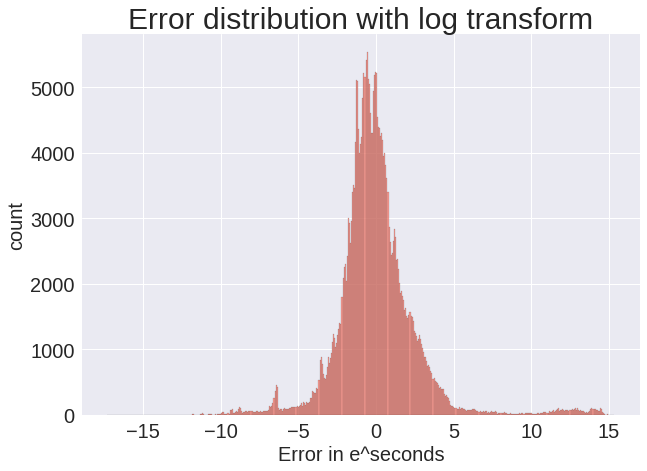

The complex linear model ran in: 293.41 seconds


Random Forest growing..


Error metrics for the Random Forest event model


The accuracy of the model is 0.7209277164690742.
The precision of the model is 0.7251827939670087, using weighted average.
The recall of the model is 0.7209277164690742, using weighted average.
The f1-score of the model is 0.7109401779028248, using weighted average.


The forest grew in: 5.72 seconds


Memory useage: 5442 MB
CPU percentage: 109.1 %
Run time of algorithm: 323.87 seconds
1170758


In [10]:
run_all()

In [14]:
# data = get_data(TRAIN, TEST)

# processed = preprocess(data)

In [15]:
# X_train, X_test, y_train, y_test = features_split(processed)

In [16]:
# y_train